In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import files
uploaded = files.upload()

claimants = pd.read_csv("claimants.csv")
claimants.head()

Saving claimants.csv to claimants.csv


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
claimants.shape

(1340, 7)

In [ ]:
len(claimants['CASENUM'].unique())

1283

In [ ]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [ ]:
#Shape of the data set
claimants.shape

(1340, 6)

In [ ]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

# classifier.write_to_pickle('path of file.pkl')
# classifier.save('Model.hd5')

LogisticRegression()

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier.predict(X)

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch? 
## F1 score – What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
classifier.predict_proba(X)[:,1]

array([3.04621690e-06, 5.07148875e-01, 5.75166843e-01, ...,
       7.39028665e-01, 2.85940593e-01, 6.80431213e-01])

In [ ]:
# ROC Curve

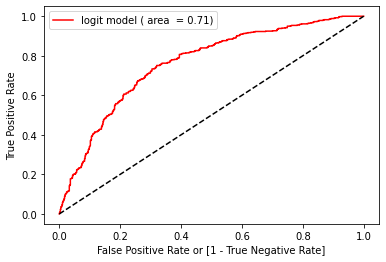

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
auc

0.7108589063606365

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.Logit(Y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.587825
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1096
Model:                          Logit   Df Residuals:                     1091
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.1501
Time:                        03:27:00   Log-Likelihood:                -644.26
converged:                       True   LL-Null:                       -758.05
Covariance Type:            nonrobust   LLR p-value:                 4.379e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.4040      0.131      3.086      0.002       0.147       0.661
CLMINSUR       0.4516      0.136      3.317      0.001       0.185       0.718
SEATBELT      -0.7980      0.566     -1.411      0.158      -1.907       0.311
CLMAGE         0.0057      0.003      1.792      0.073      -0.001       0.012
LOSS          -0.3900      0.034    -11.349      0.000      -0.457      -0.323
==============================================================================
"""